# Cleaning

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


data = pd.read_csv("../csv_files/user_activity_summary_d.csv")
data.sample(5)


,User ID,# of posts,Post raw word count,# of comments,Comment raw word count,Words total,Avg time b/w activities,In r/SuicideWatch
155992,BlindsHalfClosed,1,1534,0,0,1534,0.00000,n
386102,Dead-ass,0,0,2,55,55,15265.50000,n
75625,sad-sk8er-boi,6,326,7,115,441,788181.84615,n
21230,Thebrokentiger,26,2874,44,1212,4086,744137.81429,n
192309,Heatherbanana84,1,237,0,0,237,0.00000,n


In [3]:
## ,'direwolfnotinbed', 'pkbooo' not mods yet during data collection
modUsers = {'S2S2S2S2S2','SicSemperHumanus','SQLwitch','skyqween','UnDire','Psy-Kosh','MykeeB','circinia','svabhava-sunya','sofar1776'}
depMods = data.loc[data["User ID"].isin(modUsers)]
depMods

,User ID,# of posts,Post raw word count,# of comments,Comment raw word count,Words total,Avg time b/w activities,In r/SuicideWatch
4592,skyqween,49,6514,2267,120108,126622,1.083579e+05,y
4848,SQLwitch,24,4353,3549,209264,213617,7.739494e+04,y
40410,svabhava-sunya,1,171,156,23399,23570,2.393166e+05,y
41794,circinia,1,429,341,33289,33718,6.265436e+05,y
231584,S2S2S2S2S2,0,0,1,305,305,0.000000e+00,y
231876,SicSemperHumanus,0,0,16,3441,3441,4.053812e+06,y
236685,Psy-Kosh,0,0,19,1647,1647,5.420552e+06,y
237515,UnDire,0,0,76,5228,5228,9.003487e+05,y
270495,sofar1776,0,0,11,718,718,1.383136e+07,y
308722,MykeeB,0,0,6,224,224,6.698308e+06,y


In [4]:
modsRemoved = data.drop(depMods.index)
modsRemoved

,User ID,# of posts,Post raw word count,# of comments,Comment raw word count,Words total,Avg time b/w activities,In r/SuicideWatch
0,[deleted],211324,18814454,489114,6980379,25794833,442.94764,y
1,OAThrowaway,2,339,6,809,1148,206716.25000,n
2,whitefirebird,1,81,0,0,81,0.00000,n
3,throwaway45678,1,738,2,164,902,20369.66667,n
4,fingernailing,1,98,2,25,123,78247.33333,n
...,...,...,...,...,...,...,...,...
430679,davis7339,0,0,2,54,54,506.00000,n
430680,SuchSecond,0,0,1,339,339,0.00000,n
430681,MentallyWorn,0,0,1,37,37,0.00000,n
430682,gaba_la,0,0,1,5,5,0.00000,n


In [5]:
modsRemoved.loc[modsRemoved["User ID"] == "[deleted]"].index
#(modsRemoved.loc["User ID"] == "[deleted]").index
modsDelRemoved = modsRemoved.drop(modsRemoved.loc[modsRemoved["User ID"] == "[deleted]"].index)
modsDelRemoved

,User ID,# of posts,Post raw word count,# of comments,Comment raw word count,Words total,Avg time b/w activities,In r/SuicideWatch
1,OAThrowaway,2,339,6,809,1148,206716.25000,n
2,whitefirebird,1,81,0,0,81,0.00000,n
3,throwaway45678,1,738,2,164,902,20369.66667,n
4,fingernailing,1,98,2,25,123,78247.33333,n
5,merrkix,1,174,3,158,332,10011.00000,n
...,...,...,...,...,...,...,...,...
430679,davis7339,0,0,2,54,54,506.00000,n
430680,SuchSecond,0,0,1,339,339,0.00000,n
430681,MentallyWorn,0,0,1,37,37,0.00000,n
430682,gaba_la,0,0,1,5,5,0.00000,n


In [6]:
int_columns = ["# of posts", "Post raw word count", "# of comments", "Comment raw word count", "Words total", "Avg time b/w activities"]

for column in int_columns:
    sum_zero_column = (modsDelRemoved[column] == 0).sum()
    zero_col_per = (sum_zero_column / len(modsDelRemoved)) * 100
    print(f"{column}: {zero_col_per:.2f}%")


# of posts: 46.24%
Post raw word count: 47.78%
# of comments: 20.43%
Comment raw word count: 20.44%
Words total: 0.80%
Avg time b/w activities: 42.39%


In [7]:
posts_condition = modsDelRemoved["# of posts"] <= modsDelRemoved["Post raw word count"]
comments_condition = modsDelRemoved["# of comments"] <= modsDelRemoved["Comment raw word count"]

filtered_df = modsDelRemoved[posts_condition & comments_condition].reset_index(drop=True)

In [8]:
int_columns = ["# of posts", "Post raw word count", "# of comments", "Comment raw word count", "Words total", "Avg time b/w activities"]

for column in int_columns:
    sum_zero_column = (filtered_df[column] == 0).sum()
    zero_col_per = (sum_zero_column / len(filtered_df)) * 100
    print(f"{column}: {zero_col_per:.2f}%")

# of posts: 46.98%
Post raw word count: 46.98%
# of comments: 19.94%
Comment raw word count: 19.94%
Words total: 0.00%
Avg time b/w activities: 42.31%


In [20]:
filtered_df.head(10)

,User ID,# of posts,Post raw word count,# of comments,Comment raw word count,Words total,Avg time b/w activities,In r/SuicideWatch
0,OAThrowaway,2,339,6,809,1148,206716.25000,n
1,whitefirebird,1,81,0,0,81,0.00000,n
2,throwaway45678,1,738,2,164,902,20369.66667,n
3,fingernailing,1,98,2,25,123,78247.33333,n
4,merrkix,1,174,3,158,332,10011.00000,n
5,throwaway255,1,108,1,14,122,15613.50000,n
6,K-Bar,11,2753,63,3916,6669,189259.91892,y
7,locolocoloco,1,94,4,48,142,3897.00000,n
8,OopEepOrpp,1,126,2,84,210,14839.66667,n
9,cipherzero,2,143,3,15,158,90711.40000,n


In [10]:
changedYN = filtered_df.replace(to_replace = ['y','n'],value = ['1','0'])
changedYN.head(10)

,User ID,# of posts,Post raw word count,# of comments,Comment raw word count,Words total,Avg time b/w activities,In r/SuicideWatch
0,OAThrowaway,2,339,6,809,1148,206716.25000,0
1,whitefirebird,1,81,0,0,81,0.00000,0
2,throwaway45678,1,738,2,164,902,20369.66667,0
3,fingernailing,1,98,2,25,123,78247.33333,0
4,merrkix,1,174,3,158,332,10011.00000,0
5,throwaway255,1,108,1,14,122,15613.50000,0
6,K-Bar,11,2753,63,3916,6669,189259.91892,1
7,locolocoloco,1,94,4,48,142,3897.00000,0
8,OopEepOrpp,1,126,2,84,210,14839.66667,0
9,cipherzero,2,143,3,15,158,90711.40000,0


In [11]:
changedYN["In r/SuicideWatch"] = changedYN["In r/SuicideWatch"].astype('int64')
changedYN.dtypes

User ID                     object
# of posts                   int64
Post raw word count          int64
# of comments                int64
Comment raw word count       int64
Words total                  int64
Avg time b/w activities    float64
In r/SuicideWatch            int64
dtype: object

In [12]:
changedYN.head(10)

,User ID,# of posts,Post raw word count,# of comments,Comment raw word count,Words total,Avg time b/w activities,In r/SuicideWatch
0,OAThrowaway,2,339,6,809,1148,206716.25000,0
1,whitefirebird,1,81,0,0,81,0.00000,0
2,throwaway45678,1,738,2,164,902,20369.66667,0
3,fingernailing,1,98,2,25,123,78247.33333,0
4,merrkix,1,174,3,158,332,10011.00000,0
5,throwaway255,1,108,1,14,122,15613.50000,0
6,K-Bar,11,2753,63,3916,6669,189259.91892,1
7,locolocoloco,1,94,4,48,142,3897.00000,0
8,OopEepOrpp,1,126,2,84,210,14839.66667,0
9,cipherzero,2,143,3,15,158,90711.40000,0


# Analysis

In [13]:
datacolumns = ["User ID","# of posts", "Post raw word count", "# of comments", "Comment raw word count", "Words total", "Avg time b/w activities"]
X = changedYN[datacolumns]
y = changedYN["In r/SuicideWatch"]
X.head(10)


,User ID,# of posts,Post raw word count,# of comments,Comment raw word count,Words total,Avg time b/w activities
0,OAThrowaway,2,339,6,809,1148,206716.25000
1,whitefirebird,1,81,0,0,81,0.00000
2,throwaway45678,1,738,2,164,902,20369.66667
3,fingernailing,1,98,2,25,123,78247.33333
4,merrkix,1,174,3,158,332,10011.00000
5,throwaway255,1,108,1,14,122,15613.50000
6,K-Bar,11,2753,63,3916,6669,189259.91892
7,locolocoloco,1,94,4,48,142,3897.00000
8,OopEepOrpp,1,126,2,84,210,14839.66667
9,cipherzero,2,143,3,15,158,90711.40000


In [14]:
y.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    1
7    0
8    0
9    0
Name: In r/SuicideWatch, dtype: int64

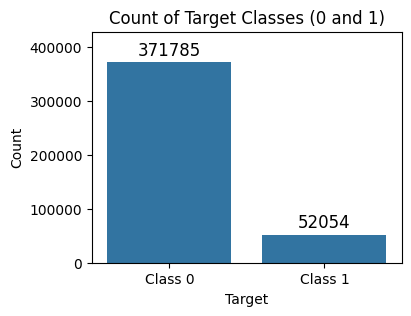

In [15]:
target_counts = changedYN["In r/SuicideWatch"].value_counts()

# Create a bar plot to visualize the counts
plt.figure(figsize=(4, 3))
ax = sns.barplot(x=target_counts.index, y=target_counts.values)

# Add some extra space above the bars
ax.set_ylim(0, target_counts.max() * 1.15)

# Add count labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), 
                textcoords='offset points')

# Customize plot labels and title
plt.title('Count of Target Classes (0 and 1)')
plt.xlabel('Target')
plt.ylabel('Count')
plt.xticks([0, 1], ['Class 0', 'Class 1']);

In [16]:
filtered_df.to_csv("clear_user_activity_d.csv", index=False)